In [82]:
import numpy as np
import pandas as pd

In [83]:
# Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).

# Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. 
# Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).

# Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

# Native Python dates and times

In [84]:
from datetime import datetime
datetime(year=2021, month=4, day=2)

datetime.datetime(2021, 4, 2, 0, 0)

In [85]:
# or using dateutil, you can parse from a variety of formats:

In [86]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [87]:
# once you have such a date object, you can for example print the day:

In [88]:
date.strftime('%A')

'Saturday'

# Numpy's datetime64

In [89]:
date_arr = np.array(['2021-02-02'], dtype=np.datetime64)

In [90]:
date_arr

array(['2021-02-02'], dtype='datetime64[D]')

In [91]:
# now we can do vectorized operations with this date:

In [92]:
date_arr + np.arange(12)

array(['2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
       '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
       '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13'],
      dtype='datetime64[D]')

# Dates and times in pandas (best of both worlds)

In [93]:
import pandas as pd
date = pd.to_datetime("4th of July, 2019")
date

Timestamp('2019-07-04 00:00:00')

In [94]:
date.strftime('%A')

'Thursday'

In [95]:
# Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [96]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15'],
              dtype='datetime64[ns]', freq=None)

# Pandas Time Series: Indexing by Time

In [97]:
date_index = pd.DatetimeIndex(['2019-01-15', '2019-02-15', '2019-03-15', '2019-04-15', '2021-03-15'])

In [98]:
time_series = pd.Series([0, 1, 2, 3, 4], index=date_index)

In [99]:
time_series

2019-01-15    0
2019-02-15    1
2019-03-15    2
2019-04-15    3
2021-03-15    4
dtype: int64

In [100]:
# Now that we have this data in a Series, we can make use of any of the Series 
#i ndexing patterns we discussed in previous sections, passing values that can be coerced into dates:
time_series['2019-01-15':'2019-03-15']

2019-01-15    0
2019-02-15    1
2019-03-15    2
dtype: int64

In [101]:
# There are additional special date-only indexing operations, s
# such as passing a year to obtain a slice of all data from that year:

In [102]:
time_series['2021']

2021-03-15    4
dtype: int64

# Pandas Time Series Data Structures

In [103]:
# For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, 
# but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.

# For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. 
# The associated index structure is PeriodIndex.

# For time deltas or durations, Pandas provides the Timedelta type. 
# Timedelta is a more efficient replacement for Python's native datetime.timedelta type, 
# and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

In [104]:
# We can convert a variety of date formats into a DatetimeIndex
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [105]:
# Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; 
# here we'll use 'D' to indicate daily frequency:

In [106]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [107]:
pd.DatetimeIndex.to_period?

Signature: pd.DatetimeIndex.to_period(self, *args, **kwargs)
Docstring:
Cast to PeriodArray/Index at a particular frequency.

Converts DatetimeArray/Index to PeriodArray/Index.

Parameters
----------
freq : str or Offset, optional
    One of pandas' :ref:`offset strings <timeseries.offset_aliases>`
    or an Offset object. Will be inferred by default.

Returns
-------
PeriodArray/Index

Raises
------
ValueError
    When converting a DatetimeArray/Index with non-regular values,
    so that a frequency cannot be inferred.

See Also
--------
PeriodIndex: Immutable ndarray holding ordinal values.
DatetimeIndex.to_pydatetime: Return DatetimeIndex as object.

Examples
--------
>>> df = pd.DataFrame({"y": [1, 2, 3]},
...                   index=pd.to_datetime(["2000-03-31 00:00:00",
...                                         "2000-05-31 00:00:00",
...                                         "2000-08-31 00:00:00"]))
>>> df.index.to_period("M")
PeriodIndex(['2000-03', '2000-05', '2000-08'],
  

In [108]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [109]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [110]:
# We can create regular sequences

In [111]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [112]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [113]:
# The spacing can be modified by altering the freq argument, which defaults to D. F
# For example, here we will construct a range of hourly timestamps:

In [114]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [115]:
# To create regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. 
#H ere are some monthly periods:

In [116]:
pd.period_range('2015-07', periods=8, freq='M') # This index stores period

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [117]:
# And a sequence of durations increasing by an hour:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [118]:
# Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
# Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing.
# There are a lot of codes - 'D' (Calendar day), 'W' (Weekly), 'M' (Month end), 'Q' (Quarter end), 'A' (Year end)
# 'H' (Hours), 'T' (Minutes), 'S' (Seconds), 'L' (Milliseconds), 'U' (Microseconds), 'N' (Nanoseconds)
# 'B' (Business day), 'BM' (Business month end) 'BQ' (Business quarter end), 'BA' (Business year end), 'BH' (Business Hours)

In [119]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [120]:
# All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module. 
# For example, we can create a business day offset directly as follows:

In [121]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, Windowing

In [122]:
!pip3 install pandas-datareader

In [123]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [124]:
# For simplicity, we'll use just the closing price:

In [125]:
goog = goog['Close']

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

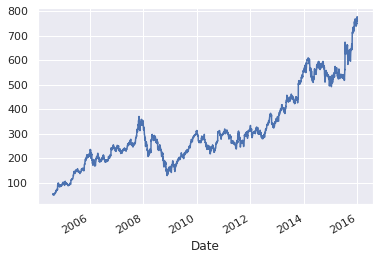

In [127]:
goog.plot();

In [129]:
goog.head()

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
Name: Close, dtype: float64

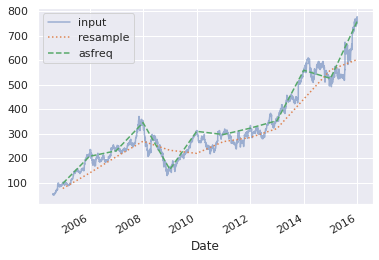

In [130]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Object `matplotlib.pyplot.plot` not found.
